# Software profesional en Acústica 2020-21 (M2i)

This notebook analyses the numerical dispersion relations for ordinary differential equations involving second derivatives. For more information, please see [Lele, S.K., 1992. Compact finite difference schemes with spectral-like resolution. Journal of computational physics, 103(1), pp.16-42](http://home.eps.hw.ac.uk/~ab226/tmp/implicit/Lele_92.pdf)

#  A general framework for Finite Difference and Finite Element Methods

In a one-dimensional setting, we have reviewed different finite difference schemes and finite element methods. Obviously, depending on the degree of the polynomial order in the Lagrangian FEM discretization or the stencil of the finite difference approximations, the discrete equations associated with the Helmholtz equation could take different expressions. For instance, we could consider

Standard Finite difference with non diagonal mass matrix:
$$ -\frac{u_{j-1} - 2u_j + u_{j+1}}{h^2} -k^2u_{j}=0$$

Finite difference with non diagonal mass matrix:
$$ -\frac{u_{j-1} - 2u_j + u_{j+1}}{h^2} -k^2\frac{u_{j-1} + 2u_j + u_{j+1}}{4}=0$$

Finite element discretization with piecewise linear elements:
$$ -\frac{u_{j-1} - 2u_j + u_{j+1}}{h^2} -k^2\frac{u_{j-1} + 4u_j + u_{j+1}}{6}=0$$

Finite element discretization with piecewise linear elements with mass lumping:
$$ -\frac{u_{j-1} - 2u_j + u_{j+1}}{h^2} -k^2u_{j}=0$$

All thes discrete schemes can be rewritten using a more general setting:
$$
c\frac{u_{j+3}-2u_{j}+u_{j-3}}{9h^2}+b\frac{u_{j+2}-2u_{j}+u_{j-2}}{4h^2}+a\frac{u_{j-1} - 2u_j + u_{j+1}}{h^2}+k^2(\beta(u_{j+2}+u_{j-2}+\alpha(u_{j+1}+u_{j-1})+u_{j})=0.
$$

Examples of this kind of discrete schemes are (see Lele 1992):
 - Second-order finite difference scheme: $a=1$, $b=c=0$, $\alpha=\beta=0$
 - Fourth-order finite difference scheme: $a=3/4$, $b=-1/3$, $c=0$,  $\alpha=\beta=0$
 - Sixth-order finite difference scheme: $a=12/11$, $b=3/11$, $c=0$, $\alpha=2/11$, $\beta=0$
 - Piecewise linear finite element method: $a=6/4$, $b=c=0$, $\alpha=1/4$, $\beta=0$
 - Fourth-order Pade scheme: $a=6/5$, $b=c=0$, $\alpha=1/10$, $\beta=0$
 - Quasi-Spectral pentadiagonal scheme: $a=0.21564935$, $b=1.7233220$, $c=0.17659730$, $\alpha=0.50209266$, $\beta=0.05569169$

## Numerical dispersion

The performance of all these discretizations can be analyzed in terms of the numerical errors (accuracy) for a given set of boundary conditions or right-hand sides. Obviously, this accuracy will depend strongly on the accuracy of the approximation of the right-hand side and the discretization of the boundary conditions. However, there exists other methodology to quantify the robustness of a discrete scheme, which is called the analysis of the numerical dispersion errors.

If the differential operator $T$ defines the Helmholtz problem, this is,
$$
Tu=u''+k^2u,
$$
it is easy to check that $T(e^{\pm i\tilde{k} x})=0$ if and only if $\tilde{k}=k$.

However, if $T_{h}$ is the discrete operator associated with the discrete schemes written above, then $T_{h}(e^{\pm ik x_{j}})\neq 0$. In fact, it is possible to compute $k_{h}$ such that $T_{h}(e^{\pm ik_{h} x})=0$. The difference between $k_{h}$ and $k$ is called dispersion error.

Let's compute the dispersion error in a simple example: the standard finite differecen scheme. In this case, replacing $u_{j}$ by $e^{ik_{h}x_{j}}$, it holds
$$
\frac{e^{ik_{h}x_{j+1}} - 2e^{ik_{h}x_{j}} + e^{ik_{h}x_{j-1}}}{h^2} +k^2e^{ik_{h}x_{j}}=0.
$$
Now, taking into account that $e^{ik_{h}x_{j}}\neq 0$, it leads to
$$
-\frac{e^{ik_{h}h} - 2 + e^{-ik_{h}h}}{h^2} -k^2=0,
$$
and hence, the relation between $k$ and $k_{h}$ is given by
$$
(kh)^2=2(\cos(k_{h}h)-1),
$$
which is called the numerical dispersion relation. From the expression above, it can be deduced that the quantity which drives the numerical dispersion relation is $kh$. This quantity informs about the number of points per wavelenght $\lambda$ that the discretization is using:
$$
\text{Points per wavelength (PPW)}=\frac{\lambda}{h}=\frac{2\pi}{kh}.
$$

Let's consider a figure where the expressions $kh$ and $k_{h}h$ are plotted.

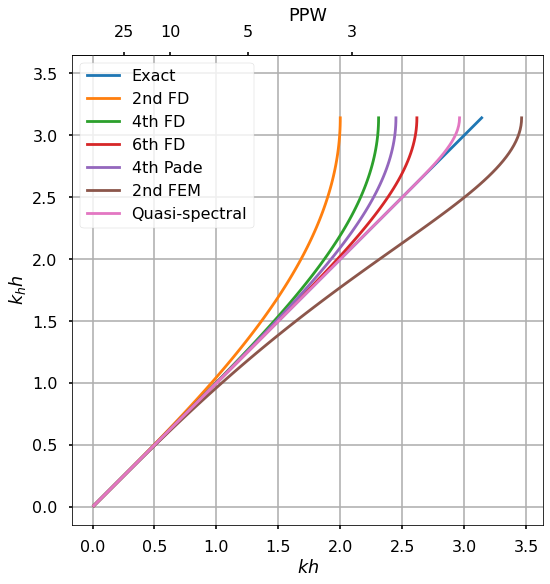

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Setting matplotlib
plt.style.use('seaborn-poster')
%matplotlib inline

# Expression for the dispersion relation in the general setting
def dispersion(hk, a, b, c, alpha, beta):
    return np.sqrt(-(2*c*(np.cos(3*hk)-1)/9+2*b*(np.cos(2*hk)-1)/4+2*a*(np.cos(hk)-1))/(2*beta*np.cos(2*hk)+1+2*alpha*np.cos(hk)))

# Plot the dispersion relations for different schemes
hk = np.linspace(0.01,np.pi,100)
fig, ax = plt.subplots(figsize=(10,8), constrained_layout=True)
ax.plot(hk, hk, label="Exact")
a=1;b=0;c=0;alpha=0;beta=0
ax.plot(dispersion(hk, a, b, c, alpha, beta), hk, label="2nd FD")
a=4/3;b=-1/3;c=0;alpha=0;beta=0
ax.plot(dispersion(hk, a, b, c, alpha, beta), hk, label="4th FD")
a=12/11;b=3/11;c=0;alpha=2/11;beta=0
ax.plot(dispersion(hk, a, b, c, alpha, beta), hk, label="6th FD")
a=6/5;b=0;c=0;alpha=1/10;beta=0;
ax.plot(dispersion(hk, a, b, c, alpha, beta), hk, label="4th Pade")
a=6/4;b=0;c=0;alpha=1/4;beta=0
ax.plot(dispersion(hk, a, b, c, alpha, beta), hk, label="2nd FEM")
a=0.21564935;b=1.7233220;c=0.17659730;alpha=0.50209266;beta=0.05569169
ax.plot(dispersion(hk, a, b, c, alpha, beta), hk, label="Quasi-spectral")

ax.set_xlabel(r'$kh$')
ax.set_ylabel(r'$k_{h}h$')
ax.grid()
plt.axis("square")
plt.legend()

def PPW2hk(x):
    return 2 * np.pi / (x+1e-10)
def hk2PPW(x):
    return 2 * np.pi / (x+1e-10)
secax = ax.secondary_xaxis('top', functions=(PPW2hk, hk2PPW))
secax.set_xlabel('PPW')
secax.set_xticks([3,5,10,25])
secax.grid()
plt.show()

### Exercise
Include in the figure above, the numerical dispersion curves associated with:
- Finite difference with non diagonal mass matrix
- Finite element discretization with piecewise linear elements with mass lumping

Which are the coefficients $a,b,c,\alpha,\beta$ for these discrete schemes?

In [2]:
## YOUR CODE HERE